### The Imapct of the degree of the non-IID data
1. precision
2. recall
3. fairness

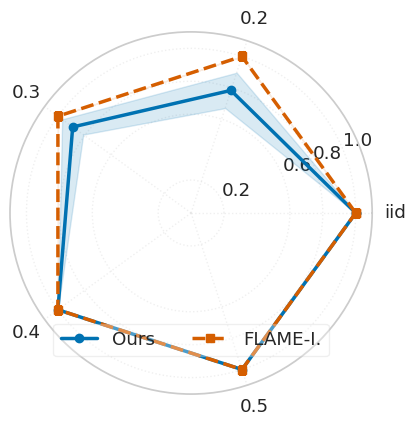

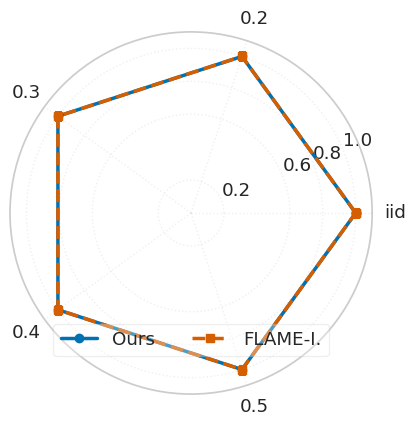

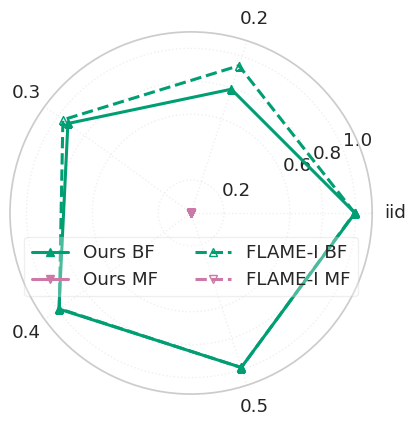

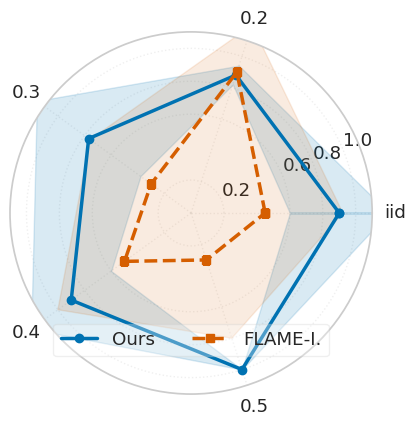

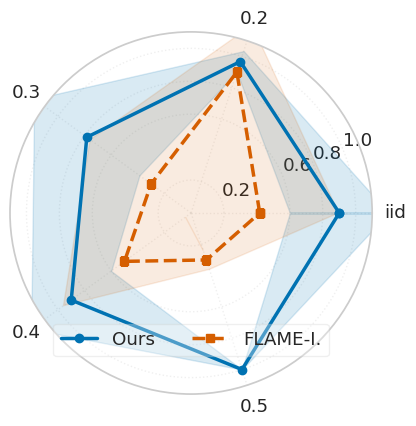

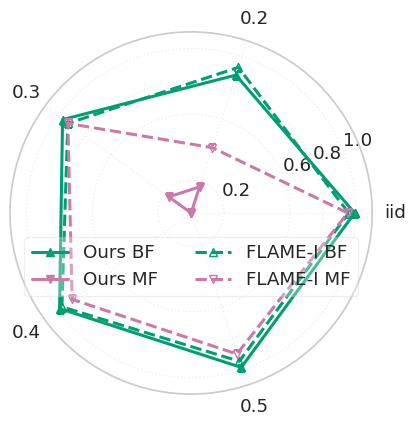

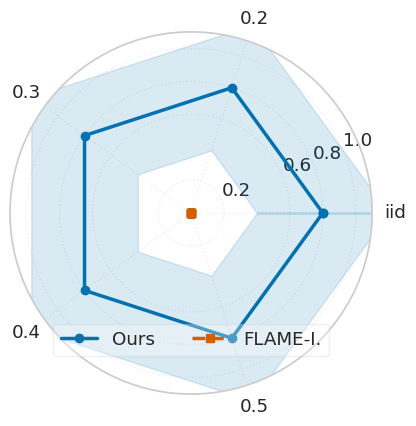

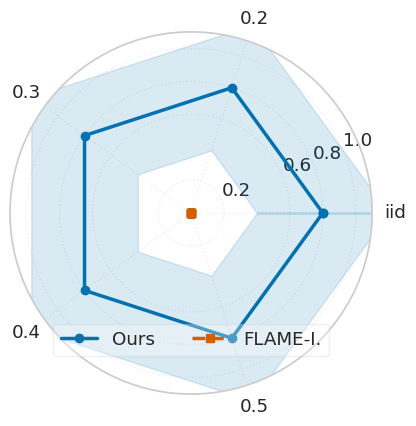

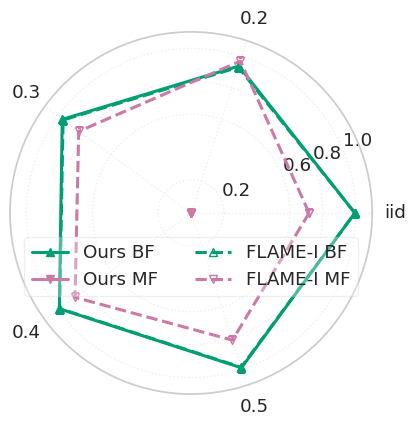

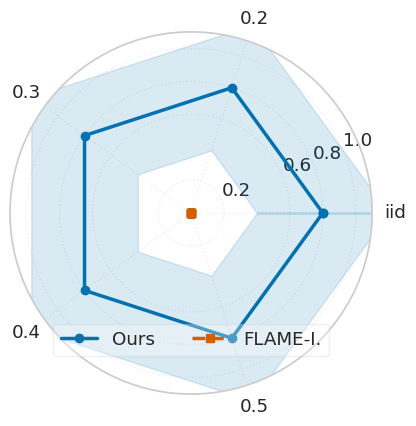

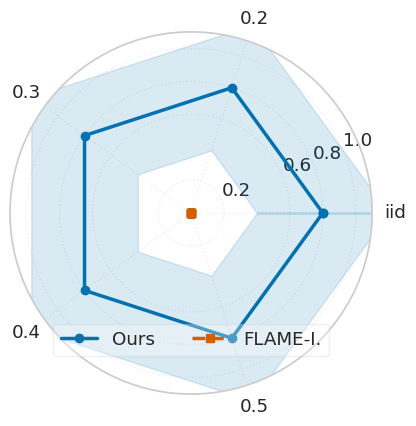

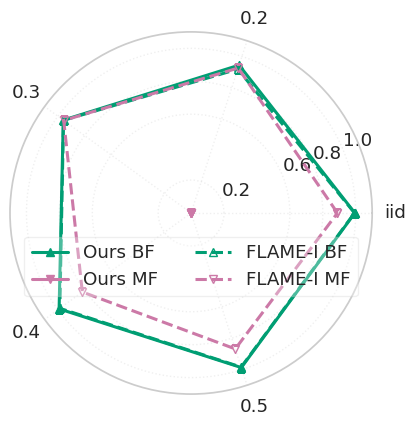

In [306]:
import numpy as np
import matplotlib.pyplot as plt

# ========== Config ==========
attacks  = ["scale", "signflip", "zero", "noise"]
degrees  = ["iid", "0.2", "0.3", "0.4", "0.5"]

# Okabe–Ito colorblind-safe
C_OURS  = "#0072B2"  # blue
C_FLAME = "#D55E00"  # vermillion
C_BF    = "#009E73"  # green
C_MF    = "#CC79A7"  # magenta

# ========== Precision (mean ± std) ==========
prec_ours = {
 "iid":[1.000,0.900,0.800,0.800],
 "0.2":[0.783,0.881,0.800,0.800],
 "0.3":[0.889,0.769,0.800,0.800],
 "0.4":[1.000,0.900,0.800,0.800],
 "0.5":[1.000,1.000,0.800,0.800],
}
prec_ours_std = {
 "iid":[0.000,0.300,0.400,0.400],
 "0.2":[0.113,0.060,0.400,0.400],
 "0.3":[0.079,0.389,0.400,0.400],
 "0.4":[0.000,0.300,0.400,0.400],
 "0.5":[0.000,0.000,0.400,0.400],
}
prec_flame = {
 "iid":[1.000,0.450,0.000,0.000],
 "0.2":[1.000,0.900,0.000,0.000],
 "0.3":[1.000,0.300,0.000,0.000],
 "0.4":[1.000,0.500,0.000,0.000],
 "0.5":[1.000,0.300,0.000,0.000],
}
prec_flame_std = {
 "iid":[0.000,0.472,0.000,0.000],
 "0.2":[0.000,0.300,0.000,0.000],
 "0.3":[0.000,0.458,0.000,0.000],
 "0.4":[0.000,0.500,0.000,0.000],
 "0.5":[0.000,0.500,0.000,0.000],
}

# ========== Recall (mean ± std) ==========
rec_ours = {
 "iid":[1.000,0.900,0.800,0.800],
 "0.2":[1.000,0.967,0.800,0.800],
 "0.3":[1.000,0.783,0.800,0.800],
 "0.4":[1.000,0.900,0.800,0.800],
 "0.5":[1.000,1.000,0.800,0.800],
}
rec_ours_std = {
 "iid":[0.000,0.300,0.400,0.400],
 "0.2":[0.000,0.067,0.400,0.400],
 "0.3":[0.000,0.395,0.400,0.400],
 "0.4":[0.000,0.300,0.400,0.400],
 "0.5":[0.000,0.000,0.400,0.400],
}
rec_flame = {
 "iid":[1.000,0.417,0.000,0.000],
 "0.2":[1.000,0.900,0.000,0.000],
 "0.3":[1.000,0.300,0.000,0.000],
 "0.4":[1.000,0.500,0.000,0.000],
 "0.5":[1.000,0.300,0.000,0.000],
}
rec_flame_std = {
 "iid":[0.000,0.479,0.000,0.000],
 "0.2":[0.000,0.300,0.000,0.000],
 "0.3":[0.000,0.458,0.000,0.000],
 "0.4":[0.000,0.458,0.000,0.000],
 "0.5":[0.000,0.060,0.000,0.000],
}

# ========== Fairness (BF, MF) ==========
fair_ours = {
 "iid":[(0.9959,0.0),(0.9934,0.0),(0.9948,0.0),(0.9948,0.0)],
 "0.2":[(0.7904,0.0),(0.8806,0.1667),(0.9384,0.0),(0.9442,0.0)],
 "0.3":[(0.9249,0.0),(0.9650,0.1667),(0.9673,0.0),(0.9597,0.0)],
 "0.4":[(0.9924,0.0),(0.9876,0.0),(0.9895,0.0),(0.9909,0.0)],
 "0.5":[(0.9868,0.0),(0.9864,0.0),(0.9891,0.0),(0.9874,0.0)],
}
fair_flame = {
 "iid":[(0.9934,0.0),(0.9572,0.9519),(0.9947,0.7171),(0.9926,0.8891)],
 "0.2":[(0.9408,0.0),(0.9300,0.4172),(0.9307,0.9699),(0.9188,0.9259)],
 "0.3":[(0.9626,0.0),(0.9256,0.9253),(0.9609,0.8437),(0.9579,0.9565)],
 "0.4":[(0.9893,0.0),(0.9700,0.8930),(0.9875,0.8715),(0.9855,0.8166)],
 "0.5":[(0.9873,0.0),(0.9472,0.9007),(0.9853,0.8122),(0.9844,0.8683)],
}

# ---------- helpers ----------
def series_over_degrees(data_by_degree, attack_idx):
    """从度字典中提取：固定 attack，跨 degree 的序列"""
    return np.array([data_by_degree[d][attack_idx] for d in degrees])

def series_over_degrees_pairtuples(data_by_degree, attack_idx, which=0):
    """fairness: which=0取BF, which=1取MF"""
    return np.array([data_by_degree[d][attack_idx][which] for d in degrees])

def closed(arr): return np.concatenate([arr, [arr[0]]])

def radar_two_methods(ax, labels, ours, ours_std, flame, flame_std, title):
    N = len(labels)
    ang = np.linspace(0, 2*np.pi, N, endpoint=False)
    ang_c = closed(ang)
    ax.plot(ang_c, closed(ours),  color=C_OURS,  lw=2.5, marker="o", label="Ours")
    if ours_std is not None:
        ax.fill_between(ang_c, closed(ours - ours_std), closed(ours + ours_std),
                        color=C_OURS, alpha=0.15)
    ax.plot(ang_c, closed(flame), color=C_FLAME, lw=2.5, marker="s", linestyle="--", label="FLAME-I.")
    if flame_std is not None:
        ax.fill_between(ang_c, closed(flame - flame_std), closed(flame + flame_std),
                        color=C_FLAME, alpha=0.12)
    ax.set_xticks(ang); ax.set_xticklabels(labels)
    ax.set_ylim(0, 1.1)
    ax.set_yticks([0.2,0.6,0.8,1.0])
    ax.set_yticklabels(["0.2","0.6","0.8","1.0"])
    ax.grid(True, alpha=0.3, linestyle=":")
    # ax.set_title(title, pad=12)

def radar_fair(ax, labels, bf_o, mf_o, bf_f, mf_f, title):
    N = len(labels)
    ang = np.linspace(0, 2*np.pi, N, endpoint=False)
    ang_c = closed(ang)
    # ours solid, flame dashed + open markers
    ax.plot(ang_c, closed(bf_o), color=C_BF, lw=2.2, marker="^", label="Ours BF")
    ax.plot(ang_c, closed(mf_o), color=C_MF, lw=2.2, marker="v", label="Ours MF")
    ax.plot(ang_c, closed(bf_f), color=C_BF, lw=2.2, marker="^", linestyle="--", markerfacecolor="none", label="FLAME-I BF")
    ax.plot(ang_c, closed(mf_f), color=C_MF, lw=2.2, marker="v", linestyle="--", markerfacecolor="none", label="FLAME-I MF")
    ax.set_xticks(ang); ax.set_xticklabels(labels)
    ax.set_ylim(0, 1.1)
    ax.set_yticks([0.2,0.6,0.8,1.0])
    ax.set_yticklabels(["0.2","0.6","0.8","1.0"])
    ax.grid(True, alpha=0.3, linestyle=":")
    # ax.set_title(title, pad=12)

# ---------- A) 2×2 grids by attack, axes = degrees ----------
def plot_precision_grid(outfile="radar_precision_by_attack.pdf"):
    fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True), figsize=(12,9))
    axes = axes.flatten()
    for i, att in enumerate(attacks):
        idx = attacks.index(att)
        ours = series_over_degrees(prec_ours, idx)
        os   = series_over_degrees(prec_ours_std, idx)
        flam = series_over_degrees(prec_flame, idx)
        fs   = series_over_degrees(prec_flame_std, idx)
        radar_two_methods(axes[i], degrees, ours, os, flam, fs, title=f"Precision — {att}")
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=2, frameon=False)
    plt.tight_layout(rect=[0.03,0.05,0.97,0.92])
    plt.savefig(outfile, dpi=300, bbox_inches="tight")
    plt.show()

def plot_recall_grid(outfile="radar_recall_by_attack.pdf"):
    fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True), figsize=(12,9))
    axes = axes.flatten()
    for i, att in enumerate(attacks):
        idx = attacks.index(att)
        ours = series_over_degrees(rec_ours, idx)
        os   = series_over_degrees(rec_ours_std, idx)
        flam = series_over_degrees(rec_flame, idx)
        fs   = series_over_degrees(rec_flame_std, idx)
        radar_two_methods(axes[i], degrees, ours, os, flam, fs, title=f"Recall — {att}")
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=2, frameon=False)
    plt.tight_layout(rect=[0.03,0.05,0.97,0.92])
    plt.savefig(outfile, dpi=300, bbox_inches="tight")
    plt.show()

def plot_fairness_grid(outfile="radar_fairness_by_attack.pdf"):
    fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True), figsize=(12,9))
    axes = axes.flatten()
    for i, att in enumerate(attacks):
        idx = attacks.index(att)
        bf_o = series_over_degrees_pairtuples(fair_ours,  idx, which=0)
        mf_o = series_over_degrees_pairtuples(fair_ours,  idx, which=1)
        bf_f = series_over_degrees_pairtuples(fair_flame, idx, which=0)
        mf_f = series_over_degrees_pairtuples(fair_flame, idx, which=1)
        radar_fair(axes[i], degrees, bf_o, mf_o, bf_f, mf_f, title=f"Fairness — {att}")
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=2, frameon=False)
    plt.tight_layout(rect=[0.03,0.05,0.97,0.92])
    plt.savefig(outfile, dpi=300, bbox_inches="tight")
    plt.show()

# plot_precision_grid()
# plot_recall_grid()
# plot_fairness_grid()

# ---------- B) 若要“逐个打印”，把下方开关设为 True ----------
PRINT_ONE_BY_ONE = True
if PRINT_ONE_BY_ONE:
    for att in attacks:
        # Precision
        fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(4.5,4.5))
        idx = attacks.index(att)
        radar_two_methods(
            ax, degrees,
            series_over_degrees(prec_ours, idx),
            series_over_degrees(prec_ours_std, idx),
            series_over_degrees(prec_flame, idx),
            series_over_degrees(prec_flame_std, idx),
            title=f"Precision — {att}")
        ax.legend(loc="upper center", bbox_to_anchor=(0.5, 0.22), ncol=2, frameon=True, framealpha=0.3)
        plt.tight_layout(); plt.savefig(f"radar_precision_{att}.pdf", dpi=300); plt.show()

        # Recall
        fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(4.5,4.5))
        radar_two_methods(
            ax, degrees,
            series_over_degrees(rec_ours, idx),
            series_over_degrees(rec_ours_std, idx),
            series_over_degrees(rec_flame, idx),
            series_over_degrees(rec_flame_std, idx),
            title=f"Recall — {att}")
        ax.legend(loc="upper center", bbox_to_anchor=(0.5, 0.22), ncol=2, frameon=True, framealpha=0.3)
        plt.tight_layout(); plt.savefig(f"radar_recall_{att}.pdf", dpi=300); plt.show()

        # Fairness
        fig, ax = plt.subplots(subplot_kw=dict(polar=True), figsize=(4.5, 4.5))
        radar_fair(
            ax, degrees,
            series_over_degrees_pairtuples(fair_ours,  idx, 0),
            series_over_degrees_pairtuples(fair_ours,  idx, 1),
            series_over_degrees_pairtuples(fair_flame, idx, 0),
            series_over_degrees_pairtuples(fair_flame, idx, 1),
            title=f"Fairness — {att}")
        ax.legend(loc="upper center", bbox_to_anchor=(0.5, 0.46), ncol=2, frameon=True, framealpha=0.3)
        plt.tight_layout(); plt.savefig(f"radar_fairness_{att}.pdf", dpi=300); plt.show()


### The Impact of the Degree of non-IID Data
1. global acc
2. global loss

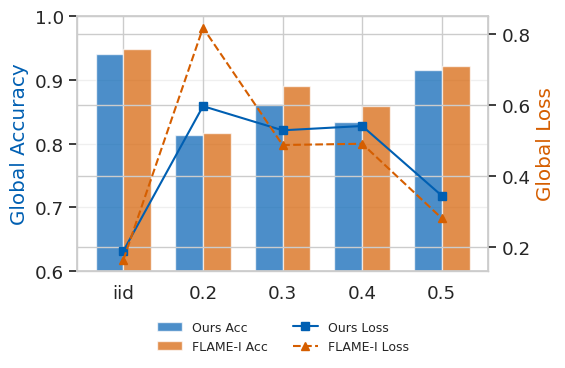

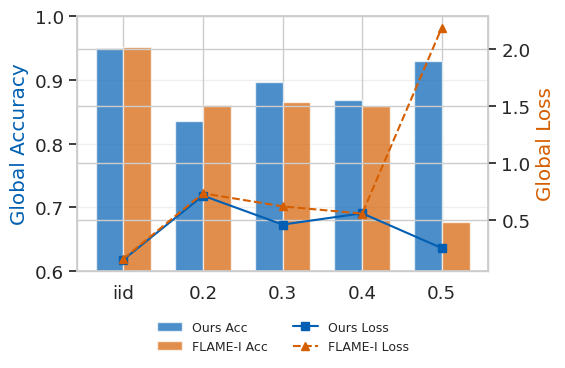

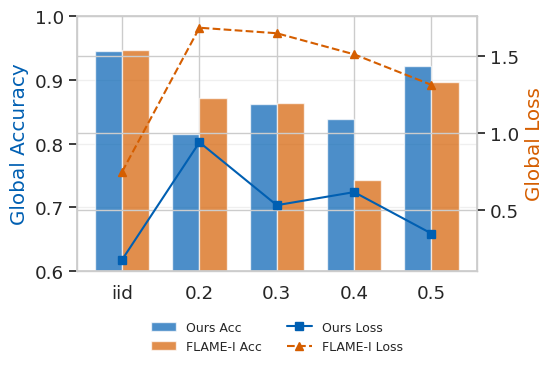

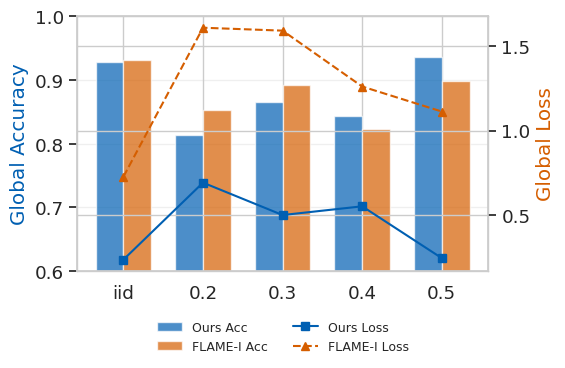

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# --- Font style ---
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True

# ==== Data (from your tables) ====
degrees = ["iid", 0.2, 0.3, 0.4, 0.5]
attacks = ["scale", "signflip", "zero", "noise"]

# Ours (acc, loss)
ours_acc = {
    "scale":   [0.9405, 0.8141, 0.8617, 0.8346, 0.9157],
    "signflip":[0.9497, 0.8362, 0.8968, 0.8681, 0.9302],
    "zero":    [0.9453, 0.8147, 0.8617, 0.8381, 0.9220],
    "noise":   [0.9287, 0.8135, 0.8650, 0.8427, 0.9353]
}
ours_loss = {
    "scale":   [0.1894, 0.5977, 0.5295, 0.5417, 0.3452],
    "signflip":[0.1563, 0.7155, 0.4626, 0.5613, 0.2572],
    "zero":    [0.1819, 0.9414, 0.5342, 0.6189, 0.3508],
    "noise":   [0.2375, 0.6923, 0.5009, 0.5525, 0.2466]
}

# Baseline (acc, loss)
fl_acc = {
    "scale":   [0.9478, 0.8172, 0.8901, 0.8587, 0.9220],
    "signflip":[0.9515, 0.8606, 0.8657, 0.8585, 0.6768],
    "zero":    [0.9467, 0.8715, 0.8638, 0.7430, 0.8965],
    "noise":   [0.9312, 0.8536, 0.8926, 0.8233, 0.8982]
}
fl_loss = {
    "scale":   [0.1647, 0.8189, 0.4881, 0.4916, 0.2815],
    "signflip":[0.1646, 0.7356, 0.6218, 0.5584, 2.1828],
    "zero":    [0.7507, 1.6826, 1.6469, 1.5105, 1.3129],
    "noise":   [0.7275, 1.6074, 1.5902, 1.2601, 1.1124]
}

# ==== Style ====
colors = {"Ours":"#005FB2", "FLAME-I":"#D55E00"}  # blue / vermillion
markers = {"Ours":"s", "FLAME-I":"^"}

def full_box(ax):
    for sp in ax.spines.values():
        sp.set_visible(True)
        sp.set_linewidth(1.0)

# ==== Plot one by one ====
bar_width = 0.35
x = np.arange(len(degrees))

for att in attacks:
    fig, ax = plt.subplots(figsize=(6,4))
    full_box(ax)
    
    # Left y-axis = Accuracy (bar)
    ax.set_ylabel("Global Accuracy", color=colors["Ours"])
    ax.bar(x - bar_width/2, ours_acc[att], bar_width, label="Ours Acc", 
           color=colors["Ours"], alpha=0.7)
    ax.bar(x + bar_width/2, fl_acc[att], bar_width, label="FLAME-I Acc", 
           color=colors["FLAME-I"], alpha=0.7)
    ax.set_ylim(0.6, 1.0)
    
    # Right y-axis = Loss (line)
    ax2 = ax.twinx()
    ax2.plot(x, ours_loss[att], marker=markers["Ours"], color=colors["Ours"], 
             linestyle="-", label="Ours Loss")
    ax2.plot(x, fl_loss[att], marker=markers["FLAME-I"], color=colors["FLAME-I"], 
             linestyle="--", label="FLAME-I Loss")
    ax2.set_ylabel("Global Loss", color=colors["FLAME-I"])
    
    # X-axis
    ax.set_xticks(x)
    ax.set_xticklabels(degrees)
    ax.set_title(att.capitalize())
    ax.grid(True, axis="y", alpha=0.3)
    
    # Legends
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines+lines2, labels+labels2, loc="upper center", 
            #    bbox_to_anchor=(0.68, 0.96), 
               bbox_to_anchor=(0.5, -0.15), 
               ncol=2, frameon=False, fontsize=9)
    
    
    plt.tight_layout()
    plt.savefig(f"global_acc_loss_{att}.pdf", dpi=300, bbox_inches="tight")
    plt.show()


#### The impact of the poisoned model ratio
1. precision
2. recall
3. benign fairness
4. malicious fairness

In [263]:
import numpy as np
import matplotlib.pyplot as plt

# --- Keep font simple to avoid slow font lookup; use a clean sans-serif ---
import matplotlib as mpl
mpl.rcParams['font.family'] = 'DejaVu Sans'  # If you have Helvetica locally, switch here

# ---------- Data (redefine to ensure fresh state) ----------
ratios = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
attacks = ["scale", "signflip", "zero", "noise"]

# Ours
ours_precision_mean = {"scale":np.array([0.933,1.000,1.000,1.000,0.800]),
                       "signflip":np.array([0.900,1.000,1.000,0.900,1.000]),
                       "zero":np.array([0.900,0.800,0.800,0.800,1.000]),
                       "noise":np.array([1.000,1.000,0.800,0.800,0.800])}
ours_precision_std  = {"scale":np.array([0.133,0.000,0.000,0.000,0.400]),
                       "signflip":np.array([0.300,0.000,0.000,0.300,0.000]),
                       "zero":np.array([0.300,0.400,0.400,0.400,0.000]),
                       "noise":np.array([0.000,0.000,0.400,0.400,0.400])}
ours_recall_mean    = {"scale":np.array([1.000,1.000,1.000,1.000,0.800]),
                       "signflip":np.array([0.900,1.000,1.000,0.900,0.820]),
                       "zero":np.array([0.900,0.800,0.800,0.800,0.940]),
                       "noise":np.array([1.000,1.000,0.800,0.800,0.800])}
ours_recall_std     = {"scale":np.array([0.000,0.000,0.000,0.000,0.400]),
                       "signflip":np.array([0.300,0.000,0.000,0.300,0.360]),
                       "zero":np.array([0.300,0.400,0.400,0.400,0.120]),
                       "noise":np.array([0.000,0.000,0.400,0.400,0.400])}
ours_bf_mean        = {"scale":np.array([0.9900,0.9851,0.9868,0.9764,0.9926]),
                       "signflip":np.array([0.9882,0.9855,0.9864,0.9840,0.9868]),
                       "zero":np.array([0.9929,0.9891,0.9891,0.9810,0.9903]),
                       "noise":np.array([0.9819,0.9879,0.9874,0.9798,0.9902])}
ours_mf_mean        = {k: np.zeros_like(ratios) for k in attacks}

# Baseline
fl_precision_mean = {"scale":np.array([0.733,1.000,1.000,1.000,0.000]),
                     "signflip":np.array([0.400,0.500,0.300,0.300,0.700]),
                     "zero":np.array([0.500,0.000,0.000,0.000,1.000]),
                     "noise":np.array([0.833,1.000,0.000,0.000,0.000])}
fl_precision_std  = {"scale":np.array([0.133,0.000,0.000,0.000,0.000]),
                     "signflip":np.array([0.490,0.500,0.500,0.458,0.458]),
                     "zero":np.array([0.500,0.000,0.000,0.000,0.000]),
                     "noise":np.array([0.167,0.000,0.000,0.000,0.000])}
fl_recall_mean    = {"scale":np.array([1.000,1.000,1.000,1.000,0.000]),
                     "signflip":np.array([0.400,0.500,0.300,0.300,0.080]),
                     "zero":np.array([0.500,0.000,0.000,0.000,0.700]),
                     "noise":np.array([1.000,1.000,0.000,0.000,0.000])}
fl_recall_std     = {"scale":np.array([0.000,0.000,0.000,0.000,0.000]),
                     "signflip":np.array([0.490,0.500,0.500,0.458,0.060]),
                     "zero":np.array([0.500,0.000,0.000,0.000,0.000]),
                     "noise":np.array([0.000,0.000,0.000,0.000,0.000])}
fl_bf_mean        = {"scale":np.array([0.9467,0.9821,0.9873,0.9782,0.0000]),
                     "signflip":np.array([0.9480,0.9659,0.9472,0.9300,0.9822]),
                     "zero":np.array([0.9776,0.9294,0.9853,0.9756,0.9849]),
                     "noise":np.array([0.9710,0.9826,0.9844,0.9815,0.9881])}
fl_mf_mean        = {"scale":np.array([0.0000,0.0000,0.0000,0.0000,0.9665]),
                     "signflip":np.array([0.9533,0.9680,0.9007,0.9316,0.8838]),
                     "zero":np.array([1.0000,0.8712,0.8122,0.9426,0.2649]),
                     "noise":np.array([0.0000,0.0000,0.8683,0.8790,0.9117])}

# ---------- Style ----------
COL = {"BF":"#009E73","MF":"#CC79A7","Precision":"#0072B2","Recall":"#D55E00"}  # Okabe–Ito
# Use distinct marker shapes and filled/open styles for clarity
MK = {"BF": "^", "MF": "v", "Precision": "o", "Recall": "s"}
OURS_LS, BASE_LS = "-", "--"
CAP = 4

def full_box(ax):
    for sp in ax.spines.values():
        sp.set_visible(True)
        sp.set_linewidth(1.0)

def plot_attack(ax, att):
    full_box(ax)
    # Ours (solid, filled markers)
    ax.plot(ratios, ours_bf_mean[att], color=COL["BF"], marker=MK["BF"], linestyle=OURS_LS, lw=2, label="Ours BF")
    ax.plot(ratios, ours_mf_mean[att], color=COL["MF"], marker=MK["MF"], linestyle=OURS_LS, lw=2, label="Ours MF")
    ax.errorbar(ratios, ours_precision_mean[att], 
                # yerr=ours_precision_std[att], 
                fmt=MK["Precision"]+"-",
                color=COL["Precision"], lw=2, capsize=CAP, label="Ours Precision")
    ax.errorbar(ratios, ours_recall_mean[att], 
                # yerr=ours_recall_std[att], 
                fmt=MK["Recall"]+"-",
                color=COL["Recall"], lw=2, capsize=CAP, label="Ours Recall")
    # Baseline (dashed, open markers)
    ax.plot(ratios, fl_bf_mean[att], color=COL["BF"], marker=MK["BF"], linestyle=BASE_LS, lw=2,
            markerfacecolor="none", label="FLAME-I BF")
    ax.plot(ratios, fl_mf_mean[att], color=COL["MF"], marker=MK["MF"], linestyle=BASE_LS, lw=2,
            markerfacecolor="none", label="FLAME-I MF")
    ax.errorbar(ratios, fl_precision_mean[att], 
                # yerr=fl_precision_std[att], 
                fmt=MK["Precision"]+"--",
                color=COL["Precision"], lw=2, capsize=CAP, mfc="none", label="FLAME-I Precision")
    ax.errorbar(ratios, fl_recall_mean[att], 
                # yerr=fl_recall_std[att], 
                fmt=MK["Recall"]+"--",
                color=COL["Recall"], lw=2, capsize=CAP, mfc="none", label="FLAME-I Recall")
    # Axis
#     ax.set_title(att.capitalize())
    ax.set_xlabel("Poisoned model ratio")
    ax.set_ylabel("Metric value")
    ax.set_xlim(0.09, 0.51)
    ax.set_ylim(-0.05, 1.05)
    ax.set_xticks(ratios)
    ax.set_xticklabels([str(r) for r in ratios])
    # ax.grid(True, alpha=0.25)
    # Legend BELOW each subplot (two columns), transparent
    ax.legend(loc="upper center", bbox_to_anchor=(0.50, 0.34), ncol=2, frameon=True, framealpha=0.3,
              fontsize=9)
    

# ---- Create 2×2 grid with per-subplot bottom legends ----
# fig, axes = plt.subplots(2, 2, figsize=(11.5, 9.5))
# axes = axes.flatten()
# for i, att in enumerate(attacks):
#     plot_attack(axes[i], att)

# plt.tight_layout(rect=[0.04, 0.06, 0.98, 0.98])
# out_pdf = "./metrics_4attacks_grid_errorbar_legends_below.pdf"
# # plt.savefig(out_pdf, dpi=300, bbox_inches="tight")
# plt.show()

# out_pdf


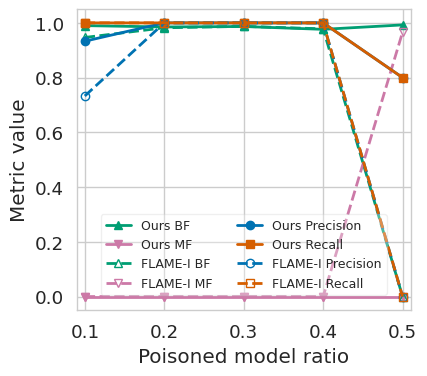

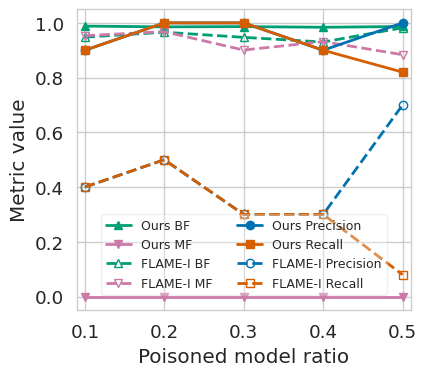

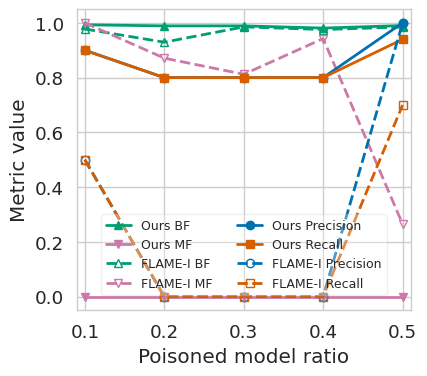

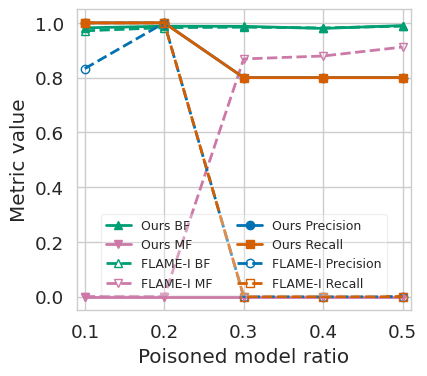

In [264]:
# ---- Print each attack one by one ----
for att in attacks:
    fig, ax = plt.subplots(figsize=(4.5, 4))
    plot_attack(ax, att)
    plt.tight_layout()
    plt.savefig(f"./metrics_{att}_panel.pdf", dpi=300, bbox_inches="tight")  # 单独文件
    plt.show()   # 逐个显示


### The Impact of the poisoned model ratio
1. global acc
2. global loss

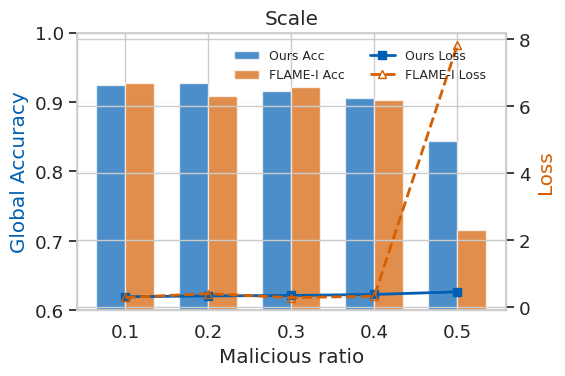

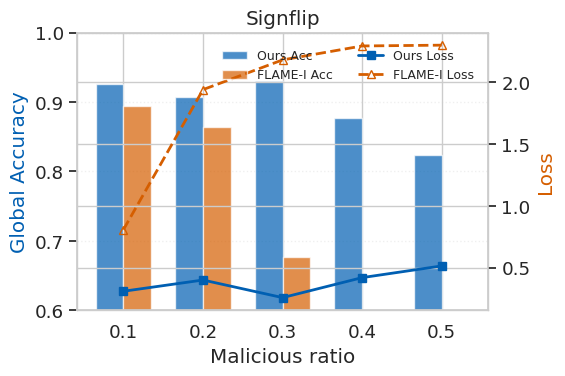

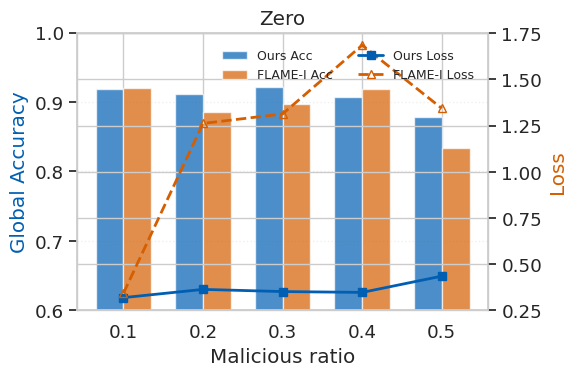

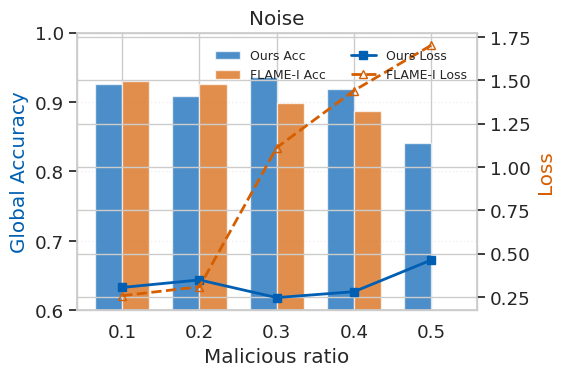

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# --- clean sans-serif ---
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True

# X 轴
degrees = [0.1, 0.2, 0.3, 0.4, 0.5]
x = np.arange(len(degrees))
bar_width = 0.35

attacks = ["scale", "signflip", "zero", "noise"]

# ===== Ours (mal-frac, non-iid=0.5) =====
ours_acc = {
    "scale":   [0.9249, 0.9276, 0.9157, 0.9058, 0.8435],
    "signflip":[0.9260, 0.9068, 0.9302, 0.8763, 0.8236],
    "zero":    [0.9189, 0.9108, 0.9220, 0.9077, 0.8783],
    "noise":   [0.9256, 0.9084, 0.9353, 0.9183, 0.8406],
}
ours_loss = {
    "scale":   [0.3083, 0.3329, 0.3452, 0.3772, 0.4537],
    "signflip":[0.3088, 0.3998, 0.2572, 0.4193, 0.5140],
    "zero":    [0.3180, 0.3626, 0.3508, 0.3463, 0.4344],
    "noise":   [0.3052, 0.3487, 0.2466, 0.2811, 0.4639],
}

# ===== Flame+incentives (mal-frac, non-iid=0.5) =====
fl_acc = {
    "scale":   [0.9272, 0.9093, 0.9220, 0.9027, 0.7155],
    "signflip":[0.8939, 0.8645, 0.6768, 0.1490, 0.1009],
    "zero":    [0.9207, 0.8861, 0.8965, 0.9192, 0.8334],
    "noise":   [0.9306, 0.9253, 0.8982, 0.8877, 0.4360],
}
fl_loss = {
    "scale":   [0.2870, 0.3997, 0.2815, 0.3242, 7.8219],
    "signflip":[0.8077, 1.9420, 2.1828, 2.2956, 2.3021],
    "zero":    [0.3414, 1.2616, 1.3129, 1.6856, 1.3433],
    "noise":   [0.2578, 0.3090, 1.1124, 1.4412, 1.7029],
}

# 色盲友好配色 + 形状
# ==== Style ====
colors = {"Ours":"#005FB2", "FLAME-I":"#D55E00"}  # blue / vermillion
markers = {"Ours":"s", "FLAME-I":"^"}

def full_box(ax):
    for sp in ax.spines.values():
        sp.set_visible(True)
        sp.set_linewidth(1.0)

def full_box(ax):
    for sp in ax.spines.values():
        sp.set_visible(True); sp.set_linewidth(1.0)


def plot_one_attack(att, savepath=None):
    fig, ax = plt.subplots(figsize=(6, 4))
    full_box(ax)


    # 左轴：Accuracy（分组柱）
    ax.set_ylabel("Global Accuracy", color=colors["Ours"])
    ax.bar(x - bar_width/2, ours_acc[att], bar_width, label="Ours Acc", 
           color=colors["Ours"], alpha=0.7)
    ax.bar(x + bar_width/2, fl_acc[att], bar_width, label="FLAME-I Acc", 
           color=colors["FLAME-I"], alpha=0.7)
    ax.set_ylim(0.6, 1.0)
    ax.grid(True, axis="y", alpha=0.3, linestyle=":")

    # 右轴：Loss（折线）
    ax2 = ax.twinx()
    ax2.plot(x, ours_loss[att], marker=markers["Ours"], linestyle="-",
             color=colors["Ours"], label="Ours Loss", linewidth=2)
    ax2.plot(x, fl_loss[att], marker=markers["FLAME-I"], linestyle="--",
             color=colors["FLAME-I"], label="FLAME-I Loss", linewidth=2, markerfacecolor="none")
    ax2.set_ylabel("Loss", color=colors["FLAME-I"])

    # X 轴
    ax.set_xticks(x); ax.set_xticklabels(degrees)
    ax.set_xlabel("Malicious ratio")
    ax.set_title(att.capitalize())

    # 合并图例（不遮挡）
    h1, l1 = ax.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax2.legend(h1+h2, l1+l2, loc="upper center", bbox_to_anchor=(0.66, 0.98),
               ncol=2, frameon=False, fontsize=9)

    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches="tight")
    plt.show()

# 逐个打印 / 保存
for att in attacks:
    plot_one_attack(att, savepath=f"global_acc_loss_dualaxis_{att}.pdf")


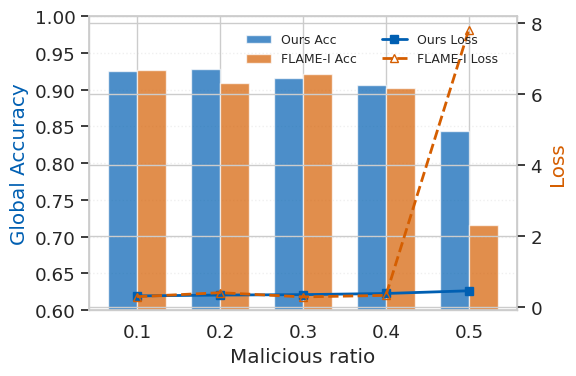

/var/folders/7m/dxc0c5jn3wxgnmc8pyf_kg6myjqnh1/T/ipykernel_18870/2138446695.py:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


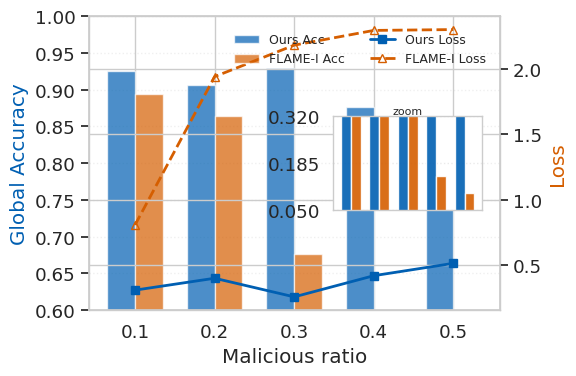

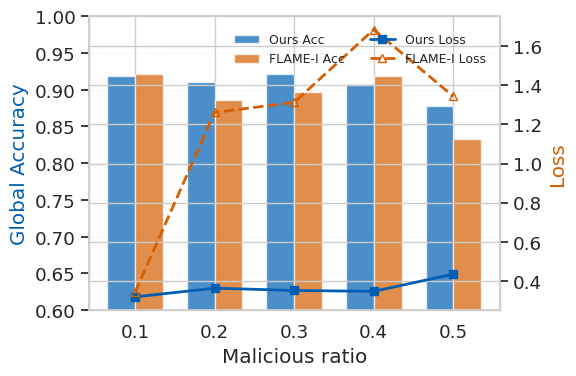

/var/folders/7m/dxc0c5jn3wxgnmc8pyf_kg6myjqnh1/T/ipykernel_18870/2138446695.py:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


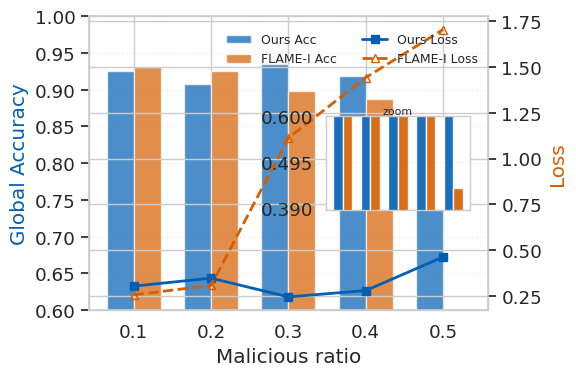

In [305]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes  # ← 新增

# --- clean sans-serif ---
mpl.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['axes.spines.top'] = True
mpl.rcParams['axes.spines.right'] = True

# X 轴
degrees = [0.1, 0.2, 0.3, 0.4, 0.5]
x = np.arange(len(degrees))
bar_width = 0.35

attacks = ["scale", "signflip", "zero", "noise"]

# ===== Ours (mal-frac, non-iid=0.5) =====
ours_acc = {
    "scale":   [0.9249, 0.9276, 0.9157, 0.9058, 0.8435],
    "signflip":[0.9260, 0.9068, 0.9302, 0.8763, 0.8236],
    "zero":    [0.9189, 0.9108, 0.9220, 0.9077, 0.8783],
    "noise":   [0.9256, 0.9084, 0.9353, 0.9183, 0.8406],
}
ours_loss = {
    "scale":   [0.3083, 0.3329, 0.3452, 0.3772, 0.4537],
    "signflip":[0.3088, 0.3998, 0.2572, 0.4193, 0.5140],
    "zero":    [0.3180, 0.3626, 0.3508, 0.3463, 0.4344],
    "noise":   [0.3052, 0.3487, 0.2466, 0.2811, 0.4639],
}

# ===== Flame+incentives (mal-frac, non-iid=0.5) =====
fl_acc = {
    "scale":   [0.9272, 0.9093, 0.9220, 0.9027, 0.7155],
    "signflip":[0.8939, 0.8645, 0.6768, 0.1490, 0.1009],
    "zero":    [0.9207, 0.8861, 0.8965, 0.9192, 0.8334],
    "noise":   [0.9306, 0.9253, 0.8982, 0.8877, 0.4360],
}
fl_loss = {
    "scale":   [0.2870, 0.3997, 0.2815, 0.3242, 7.8219],
    "signflip":[0.8077, 1.9420, 2.1828, 2.2956, 2.3021],
    "zero":    [0.3414, 1.2616, 1.3129, 1.6856, 1.3433],
    "noise":   [0.2578, 0.3090, 1.1124, 1.4412, 1.7029],
}

# ==== Style ====
colors = {"Ours":"#005FB2", "FLAME-I":"#D55E00"}  # blue / vermillion
markers = {"Ours":"s", "FLAME-I":"^"}

def full_box(ax):
    for sp in ax.spines.values():
        sp.set_visible(True); sp.set_linewidth(1.0)

def plot_one_attack(att, savepath=None):
    fig, ax = plt.subplots(figsize=(6, 4))
    full_box(ax)

    # 左轴：Accuracy（分组柱）
    ax.set_ylabel("Global Accuracy", color=colors["Ours"])
    ax.bar(x - bar_width/2, ours_acc[att], bar_width, label="Ours Acc",
           color=colors["Ours"], alpha=0.7)
    ax.bar(x + bar_width/2, fl_acc[att], bar_width, label="FLAME-I Acc",
           color=colors["FLAME-I"], alpha=0.7)
    ax.set_ylim(0.6, 1.0)
    ax.grid(True, axis="y", alpha=0.3, linestyle=":")

    # 右轴：Loss（折线）
    ax2 = ax.twinx()
    ax2.plot(x, ours_loss[att], marker=markers["Ours"], linestyle="-",
             color=colors["Ours"], label="Ours Loss", linewidth=2)
    ax2.plot(x, fl_loss[att], marker=markers["FLAME-I"], linestyle="--",
             color=colors["FLAME-I"], label="FLAME-I Loss", linewidth=2, markerfacecolor="none")
    ax2.set_ylabel("Loss", color=colors["FLAME-I"])

    # X 轴
    ax.set_xticks(x); ax.set_xticklabels(degrees)
    ax.set_xlabel("Malicious ratio")
    # ax.set_title(att.capitalize())

    # —— 仅对 zero / noise 添加右侧放大框（放大 Accuracy）——
    if att in {"signflip", "noise"}:
        # 自动确定放大 y 范围：以该场景的最小 accuracy 为中心
        all_acc = np.array(ours_acc[att] + fl_acc[att])
        acc_min = float(np.min(all_acc))
        y0 = max(0.00, acc_min - 0.05)      # 下边界留白
        y1 = min(0.60, acc_min + 0.22)     # 上边界不超过 0.60，避免与主轴重叠

        # 在靠右空白区域放置 inset（大小可按需微调）
        axin = inset_axes(ax, width="36%", height="32%",
                          loc="center right", borderpad=1.0)
        full_box(axin)
        axin.bar(x - bar_width/2, ours_acc[att], bar_width,
                 color=colors["Ours"], alpha=0.9)
        axin.bar(x + bar_width/2, fl_acc[att], bar_width,
                 color=colors["FLAME-I"], alpha=0.9)
        axin.set_ylim(y0, y1)
        axin.set_xlim(-0.6, len(x)-0.4)
        axin.set_xticks([])                       # inset 不显示 x 轴刻度
        axin.set_yticks(np.linspace(round(y0,2), round(y1,2), 3))
        axin.grid(True, axis="y", alpha=0.4, linestyle=":")
        axin.set_title("zoom", fontsize=8, pad=0.5)

    # 合并图例（不遮挡）
    h1, l1 = ax.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax2.legend(h1+h2, l1+l2, loc="upper center", bbox_to_anchor=(0.66, 0.98),
               ncol=2, frameon=False, fontsize=9)

    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=300, bbox_inches="tight")
    plt.show()

# 逐个打印 / 保存（仅 zero 与 noise 有放大框）
for att in attacks:
    plot_one_attack(att, savepath=f"global_acc_loss_dualaxis_{att}.pdf")
